In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, log_loss
from sklearn import metrics

In [3]:
spotify_df = pd.read_csv('mcspotifytracks.csv')

In [4]:
spotify_df

Unnamed: 0            track_name                     album  \
0               0         One More Year             The Slow Rush   
1               1      Vámonos de Viaje                      BACH   
2               2                 Sofia                  Immunity   
3               3          Sadnecessary              Sadnecessary   
4               4            Closedloop              Boomerang EP   
...           ...                   ...                       ...   
15296       15296          Exile 007 A1                 EXILE 007   
15297       15297           Cosmic Cars                     Clear   
15298       15298  Trilogy - ANNA Remix  BURN SLOW REMIXES PT. II   
15299       15299                Jaguar           Años 2000 Vol.3   
15300       15300               Caramel                 I.D.W.I.W   

                artist release_date  length  popularity  danceability  energy  \
0          Tame Impala   2020-02-14  324013          59         0.602   0.880   
1      Bandalos Chinos   2018-08-03  235866           2         0.766   0.749   
2               Clairo   2019-08-02  188386          83         0.744   0.619   
3         Milky Chance   2013-05-31  298000          51         0.757   0.542   
4          Elliot Moss   2017-04-28  280689          37         0.803   0.420   
...                ...          ...     ...         ...           ...     ...   
15296    Johannes Heil   2017-04-27  471820          23         0.420   0.788   
15297         Cybotron   1990-11-29  267800          21         0.749   0.870   
15298    Chris Liebing   2020-06-12  409460          22         0.747   0.947   
15299  Various Artists         2001  215693           0         0.639   0.855   
15300      The Martian   2019-12-15  237153           0         0.782   0.391   

       key  ...  mode  speechiness  acousticness  instrumentalness  liveness  \
0        1  ...     1       0.0354       0.05700           0.46000    0.2840   
1        5  ...     1       0.0303       0.02490           0.00215    0.3550   
2        0  ...     1       0.0390       0.59800           0.00372    0.2310   
3        9  ...     1       0.0775       0.79600           0.01960    0.2650   
4        7  ...     0       0.0432       0.25600           0.11200    0.0703   
...    ...  ...   ...          ...           ...               ...       ...   
15296    7  ...     1       0.0403       0.01450           0.90100    0.0937   
15297    1  ...     0       0.0424       0.00480           0.23500    0.0482   
15298    2  ...     1       0.0454       0.00809           0.87300    0.1240   
15299    2  ...     0       0.0376       0.00519           0.84700    0.1420   
15300    9  ...     0       0.0770       0.41500           0.00971    0.2310   

       valence    tempo  time_signature       genre target  
0       0.4930  114.009               4        Rock    1.0  
1       0.8890  129.010               4        Rock    1.0  
2       0.6410  112.997               4        Rock    1.0  
3       0.4660  107.988               4        Rock    1.0  
4       0.4930  130.031               4        Rock    1.0  
...        ...      ...             ...         ...    ...  
15296   0.0335  129.011               4  electronic    NaN  
15297   0.9610  124.881               4  electronic    NaN  
15298   0.0278  130.003               4  electronic    NaN  
15299   0.8310  137.644               4  electronic    NaN  
15300   0.4080   94.007               4  electronic    NaN  

[15301 rows x 21 columns]

In [5]:
spotify_df.drop(['target', 'Unnamed: 0'], axis=1, inplace=True)

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


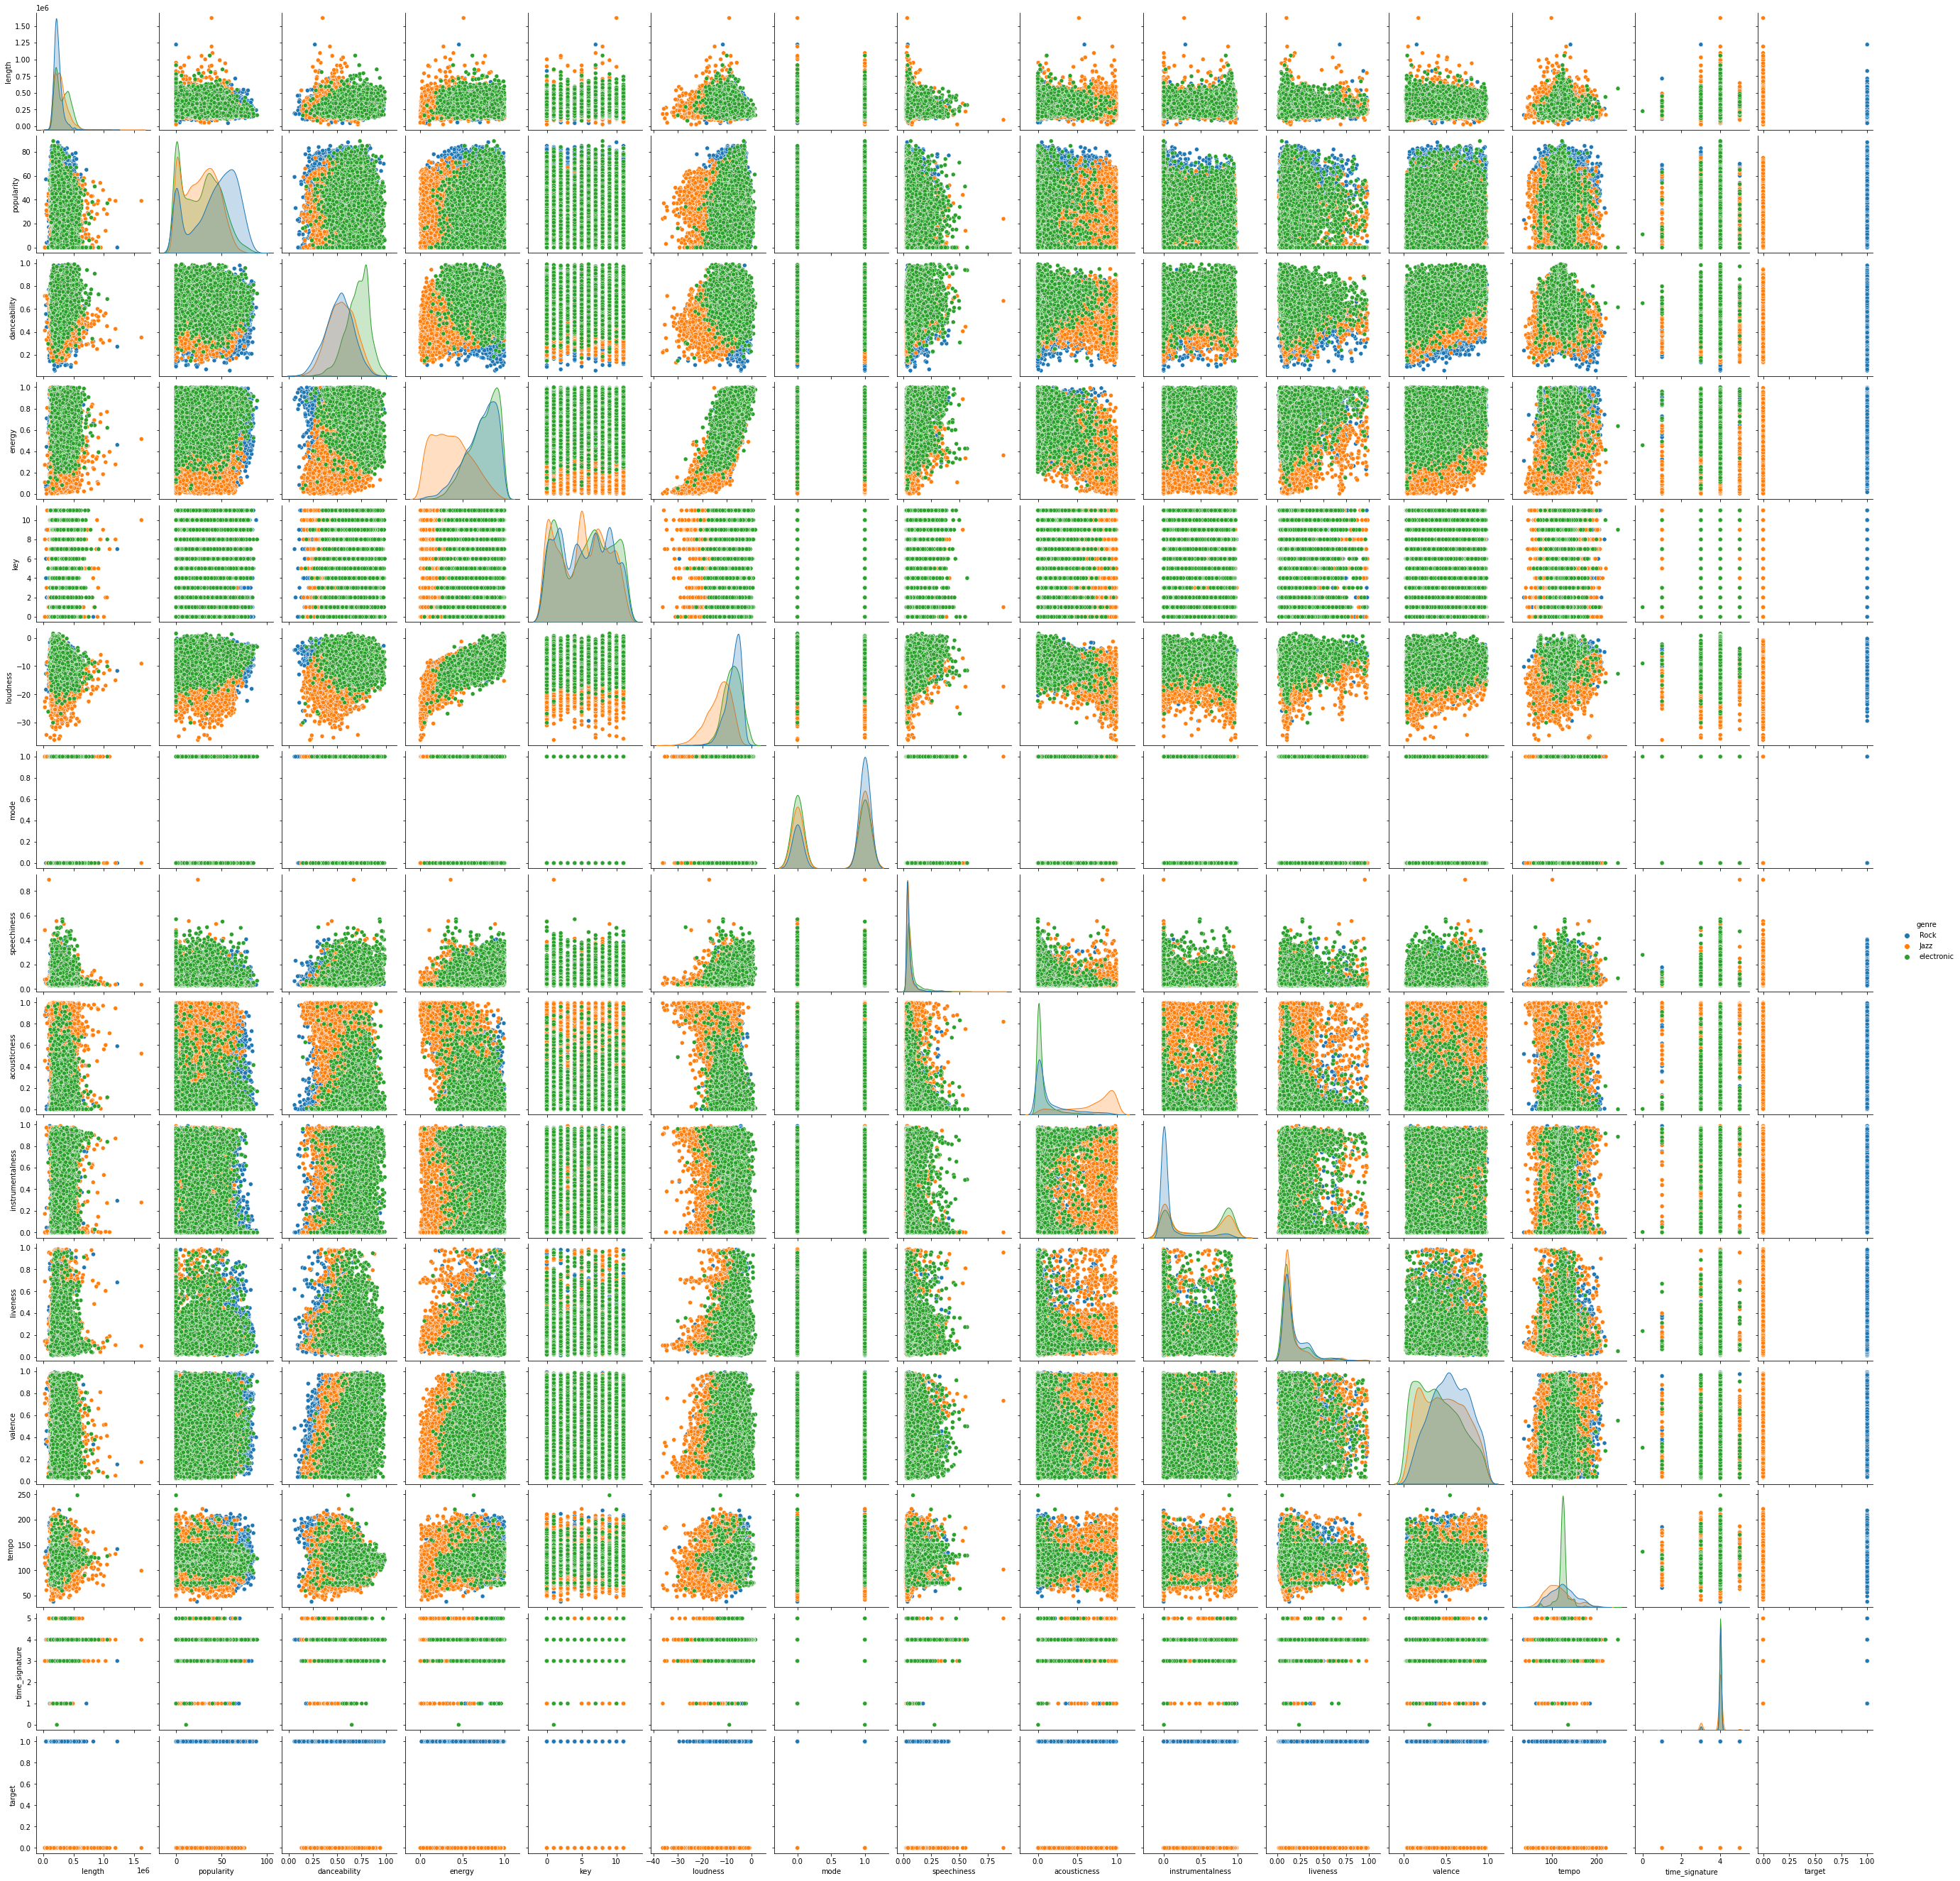

In [5]:
sns.pairplot(spotify_df, hue='genre')

/usr/local/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figur

<AxesSubplot:ylabel='Density'>

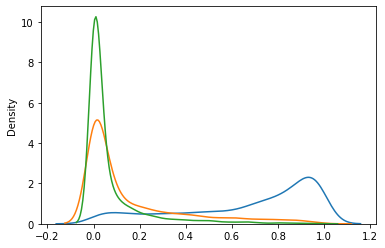

In [6]:
jazz = spotify_df.loc[spotify_df['genre'] == 'Jazz']
rock = spotify_df.loc[spotify_df['genre'] == 'Rock']
electronic = spotify_df.loc[spotify_df['genre'] == 'electronic']
 
sns.distplot(jazz[['acousticness']], hist=False)
sns.distplot(rock[['acousticness']], hist=False)
sns.distplot(electronic[['acousticness']], hist=False)

/usr/local/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figur

<AxesSubplot:ylabel='Density'>

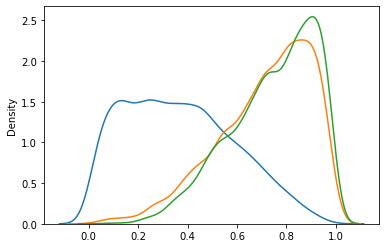

In [11]:
sns.distplot(jazz[['energy']], hist=False)
sns.distplot(rock[['energy']], hist=False)
sns.distplot(electronic[['energy']], hist=False)

/usr/local/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figur

<AxesSubplot:ylabel='Density'>

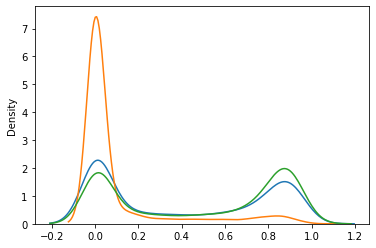

In [9]:
sns.distplot(jazz[['instrumentalness']], hist=False)
sns.distplot(rock[['instrumentalness']], hist=False)
sns.distplot(electronic[['instrumentalness']], hist=False)

In [7]:
X = np.array(spotify_df.iloc[:, 4:-1])
y = np.array(spotify_df.genre)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=39, weights='distance')
knn.fit(X_train_scaled, y_train)

y_train_pred = knn.predict(X_train_scaled)
y_val_pred = knn.predict(X_val_scaled)

In [13]:
accuracy = metrics.accuracy_score(y_train, y_train_pred)
precision = metrics.precision_score(y_train, y_train_pred, average='macro')
recall = metrics.recall_score(y_train, y_train_pred, average='macro')
f1 = metrics.f1_score(y_train, y_train_pred, average='macro')

print("Training Set Accuracy:" , round(accuracy, 3))
print("Training Set Precision:", round(precision, 3))
print("Training Set Recall:", round(recall, 3))
print("Training Set F1 Score:", round(f1, 3))

Training Set Accuracy: 1.0
Training Set Precision: 1.0
Training Set Recall: 1.0
Training Set F1 Score: 1.0


In [14]:
accuracy = metrics.accuracy_score(y_val, y_val_pred)
precision = metrics.precision_score(y_val, y_val_pred, average='macro')
recall = metrics.recall_score(y_val, y_val_pred, average='macro')
f1 = metrics.f1_score(y_val, y_val_pred, average='macro')

print("Val Set Accuracy:" , round(accuracy, 3))
print("Val Set Precision:", round(precision, 3))
print("Val Set Recall:", round(recall, 3))
print("Val Set F1 Score:", round(f1, 3))

Val Set Accuracy: 0.847
Val Set Precision: 0.847
Val Set Recall: 0.847
Val Set F1 Score: 0.847


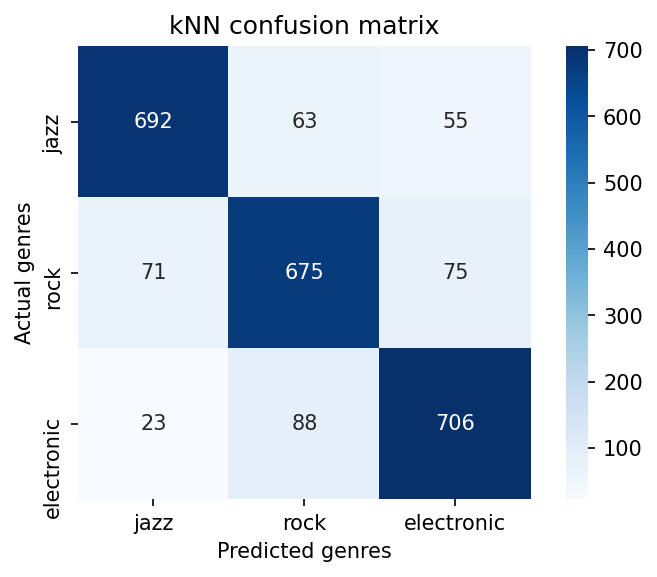

In [15]:
knn_confusion = confusion_matrix(y_val, knn.predict(X_val_scaled))
plt.figure(dpi=150)
sns.heatmap(knn_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['jazz', 'rock', 'electronic'],
           yticklabels=['jazz', 'rock', 'electronic']);

plt.xlabel('Predicted genres')
plt.ylabel('Actual genres')
plt.title('kNN confusion matrix');